In [91]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Veiw duration data

Taken from a random sample of 70,000 for events in `global_log.activity_logs`

As of Aug 30th, this corresponded to roughly 10% for total such events in the dB

Time span is July 7th until Aug 30th, though over 50% of the data is after Aug 16th, as logging has been introduced recently

-  Android intoduced July 7th
- iOS introduced Aug 9th

In [87]:
df = pd.read_csv('/Users/oisin-brogan/Data/cooking_time/view_duration_sample_20170830.csv')
df.head()

,event_time,log_time,guid,event,client_time,event_id,event_name,country,language,application_id,...,referer,via,ref,position,view_duration,local_event_time,resource_id,resource_owner_id,app_version,os_version
0,2017-08-02 12:01:56+00,2017-08-02 12:02:03+00,NaN,view_duration,NaN,NaN,NaN,ID,id,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,2017-07-31 11:30:20+00,2017-07-31 11:30:27+00,NaN,view_duration,NaN,NaN,NaN,SA,ar,1,...,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN
2,2017-07-24 12:51:48+00,2017-08-04 04:53:34+00,NaN,view_duration,NaN,NaN,NaN,AE,ar,1,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2017-08-04 21:24:09+00,2017-08-04 21:34:20+00,NaN,view_duration,NaN,NaN,NaN,SA,ar,1,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
4,2017-08-20 15:07:46+00,2017-08-20 15:07:50+00,NaN,view_duration,NaN,NaN,NaN,SA,ar,1,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN


In [88]:
#Converting from strings to datetimes
df.event_time = df.event_time.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S+00'))
df.log_time = df.log_time.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S+00'))

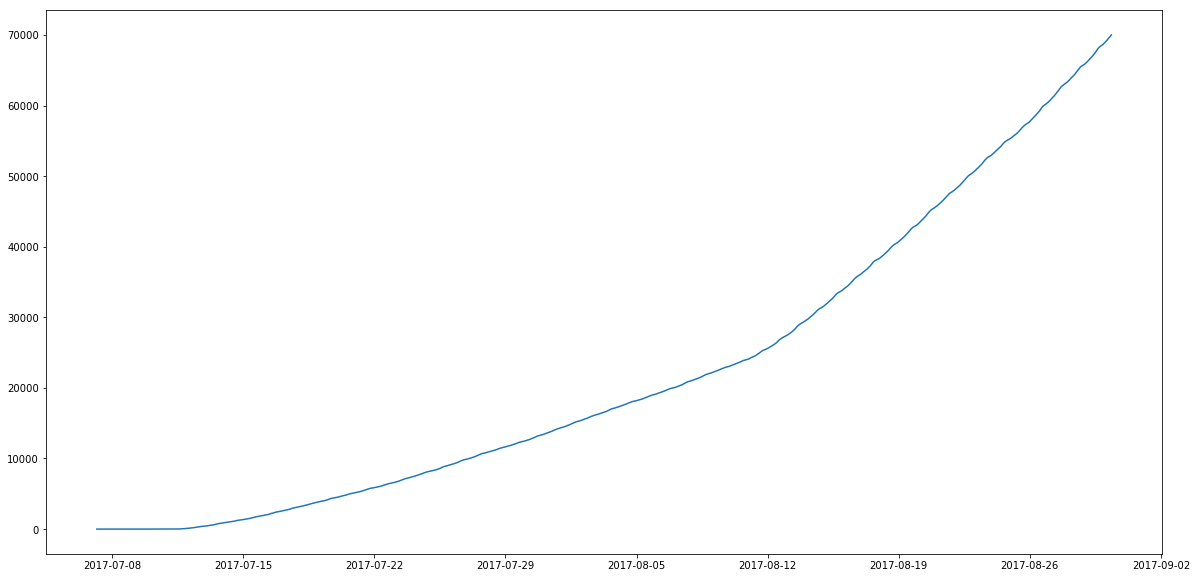

In [99]:
timeline = df.sort_values(by = 'log_time')
timeline['count'] = range(timeline.shape[0])
fig = plt.figure(figsize = [20,10])
plt.plot(timeline.log_time, timeline['count'])

In [117]:
df.log_time.quantile(.5)

Timestamp('2017-08-16 11:35:38')

In [118]:
df.groupby('application_id').log_time.min()

application_id
1   2017-07-07 04:18:19
2   2017-07-11 12:10:25
6   2017-08-09 16:55:04
Name: log_time, dtype: datetime64[ns]

In [ ]:
#Barring uninstalling or such, guid == (user + device)

In [39]:
#test = df.groupby('guid').user_id.value_counts().unstack() #18665

In [59]:
#more_then_one = test.apply(lambda x: len(x.dropna()) > 1, axis = 0)

In [63]:
#test.loc[:, 2212526.0].dropna()

In [263]:
#df[df.user_id == 2212526].dropna(axis=1, how = 'all')

In [3]:
df.view_duration.describe().round(1)

count     70000.0
mean         78.6
std         605.7
min           0.0
25%           5.0
50%          15.0
75%          40.0
max      127695.0
Name: view_duration, dtype: float64

In [5]:
df.groupby('platform').view_duration.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
app-android,24868.0,69.994290,392.933218,1.0,6.0,17.0,42.0,25154.0
app-ios,40064.0,85.481505,729.791777,0.0,5.0,14.0,38.0,127695.0


In [6]:
df.groupby('language').view_duration.describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
ar,16518.0,49.588449,200.623749,0.0,4.0,12.0,32.00,8962.0
da,1.0,111.000000,NaN,111.0,111.0,111.0,111.00,111.0
el,860.0,88.905814,318.735280,0.0,7.0,21.0,50.25,4021.0
en,2220.0,92.327477,322.204886,0.0,5.0,15.0,43.00,5919.0
es,8772.0,87.167921,362.486032,0.0,6.0,17.0,46.00,14229.0
fa,18.0,17.666667,24.774275,1.0,2.0,8.0,25.75,97.0
fr,17.0,49.000000,104.586687,0.0,4.0,14.0,15.00,355.0
hu,2772.0,136.141775,543.707844,0.0,6.0,18.0,49.00,9839.0
id,32637.0,82.696878,420.042234,0.0,6.0,16.0,41.00,25154.0


In [7]:
df.groupby('country').view_duration.describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AE,871.0,56.820896,209.040298,0.0,4.00,13.0,34.00,3331.0
AR,2580.0,91.797287,358.951030,0.0,6.00,17.0,46.00,5865.0
BH,224.0,44.781250,133.586610,0.0,5.00,15.0,38.25,1349.0
BO,56.0,83.714286,244.262952,1.0,6.00,20.0,49.00,1526.0
BR,45.0,32.244444,51.412395,0.0,6.00,17.0,34.00,315.0
CL,601.0,86.349418,338.595232,0.0,6.00,19.0,46.00,4337.0
CO,186.0,64.451613,163.042824,0.0,7.00,20.0,55.50,1214.0
CR,69.0,94.043478,201.505688,0.0,4.00,17.0,60.00,1019.0
CU,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0


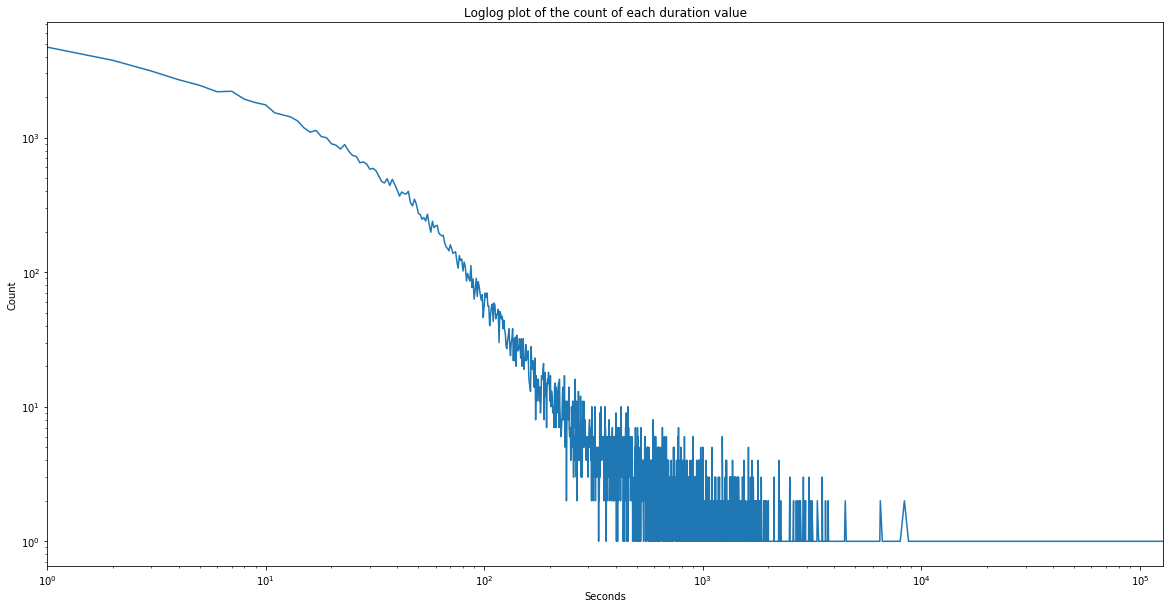

In [264]:
ax = df.view_duration.value_counts().sort_index().plot(logx=True, logy=True, figsize=[20,10])
ax.set_title("Loglog plot of the count of each duration value")
ax.set_ylabel("Count")
ax.set_xlabel('Seconds')

<Container object of 101 artists>

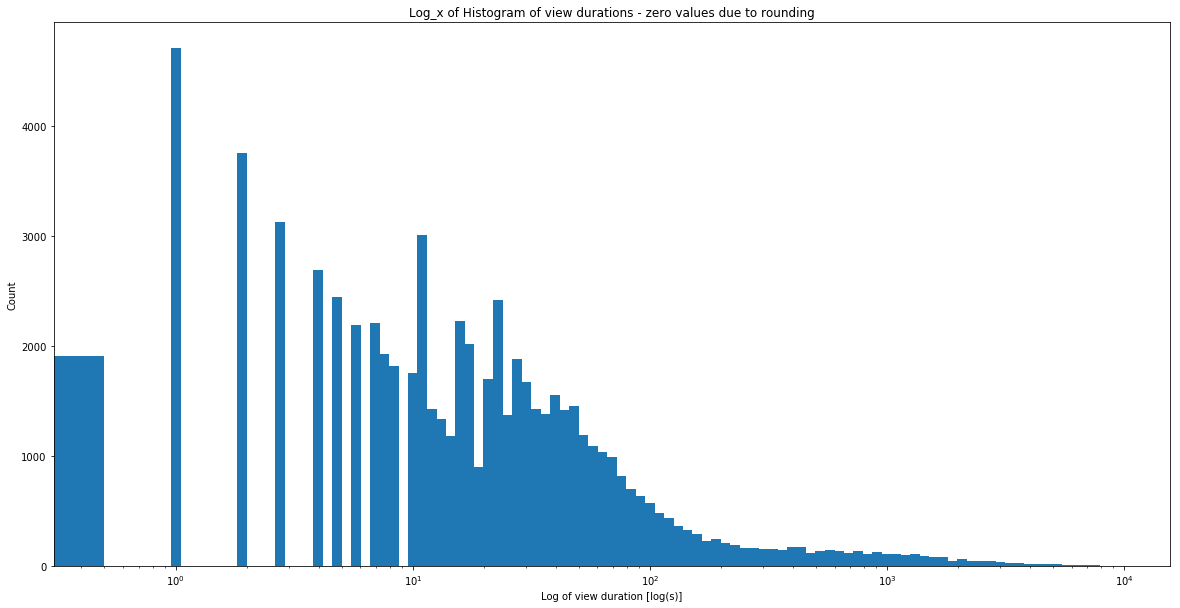

In [265]:
#make an exp hist
num_bins = 100
values = df.view_duration.values
max_x = max(values[values<10**4]) #Drop 
log_max = pd.np.log10(max_x)
bin_size = log_max/num_bins
start = 0
bins = []
counts = []
for i in range(num_bins+1):
    end = 10**(i*bin_size)
    bins.append((start,end))
    counts.append(len(values[(values < end) & (values >= start)]))
    start = end
x_points = [b[0] for b in bins]
widths = [b[1] - b[0] for b in bins]
fig = plt.figure(figsize=[20,10])
plt.xscale('log')
plt.title("Log_x of Histogram of view durations - zero values due to rounding")
plt.ylabel("Count")
plt.xlabel("Log of view duration [log(s)]")
plt.bar(x_points, counts, widths)

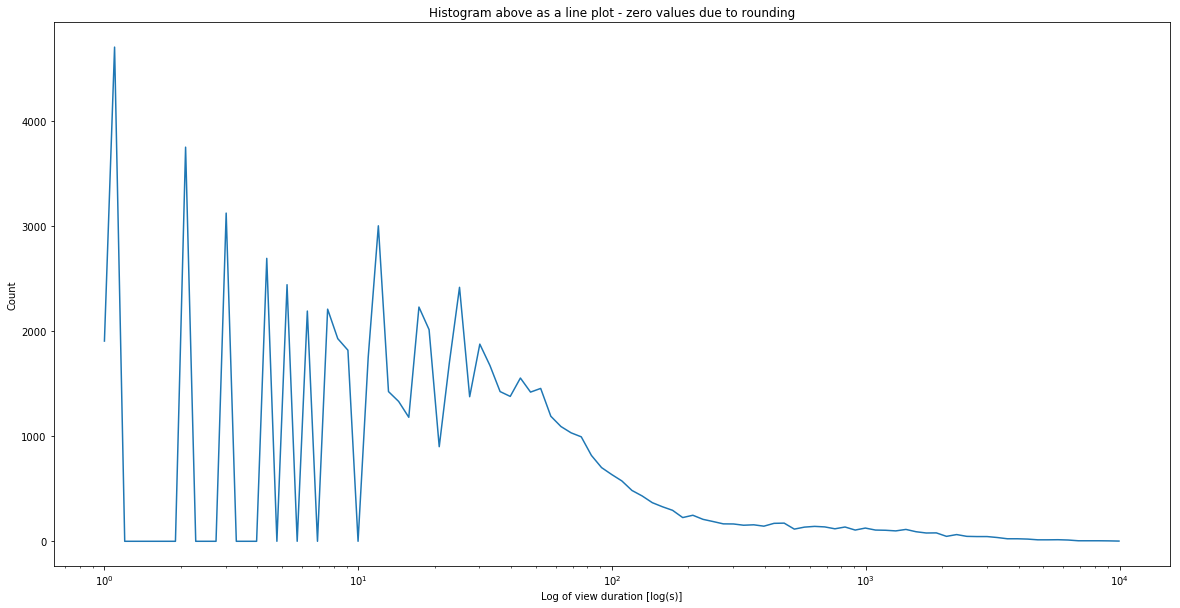

In [266]:
x_points = [b[1] for b in bins]
fig = plt.figure(figsize=[20,10])
plt.title("Histogram above as a line plot - zero values due to rounding")
plt.ylabel("Count")
plt.xlabel("Log of view duration [log(s)]")
plt.semilogx(x_points, counts)

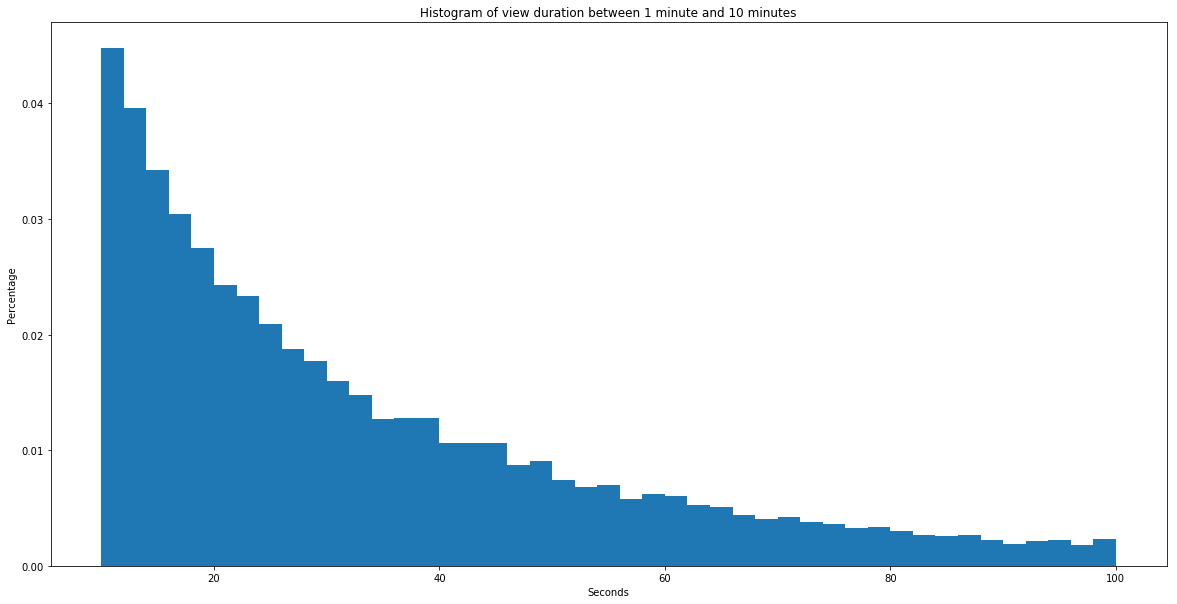

In [244]:
import matplotlib.pyplot as plt
ax = df[(df.view_duration >= 10) & ((df.view_duration <= 100))].view_duration.plot(bins=45, normed = True, kind='hist', figsize = [20,10])
ax.set_title('Histogram of view duration between 1 minute and 10 minutes')
ax.set_ylabel('Percentage')
ax.set_xlabel('Seconds')

CDF


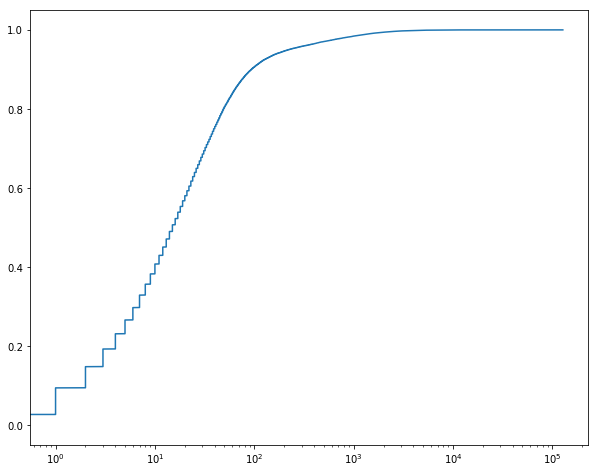

In [192]:
fig = plt.figure(figsize=[10,8])
plt.xscale('log')
p = plt.plot(df.view_duration.sort_values().values, df.index/df.shape[0])
print('CDF')

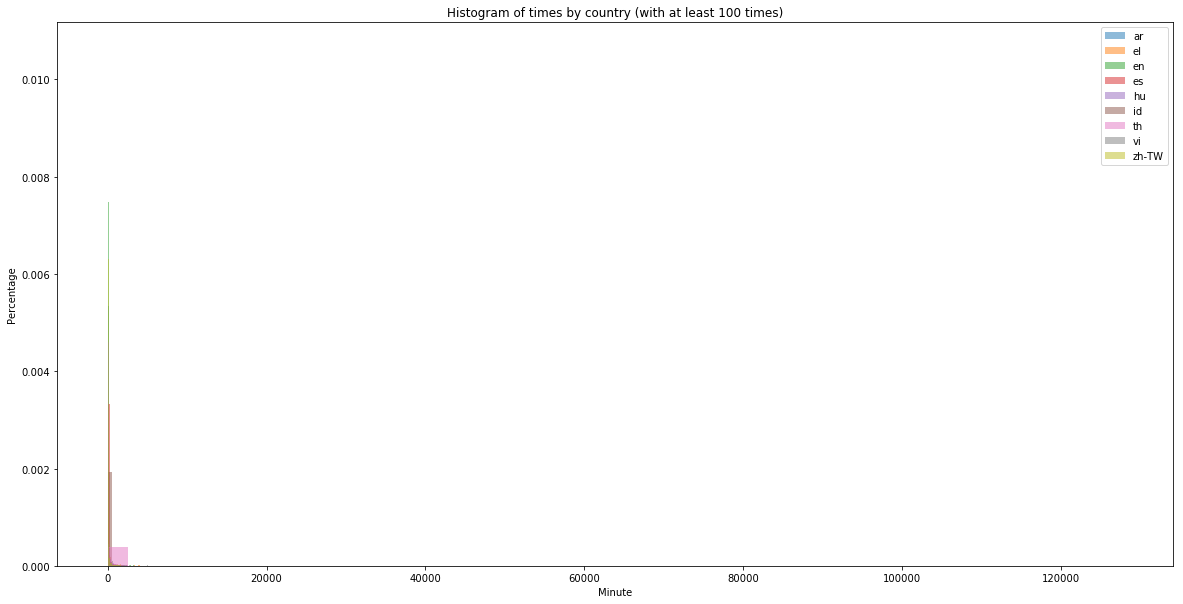

In [23]:
ax = df.groupby('language').filter(lambda x: len(x) > 100).groupby('language').view_duration.plot(bins=50, normed = True,
                                                                    kind = 'hist', figsize=(20,10), legend = True, alpha = .5)
ax[0].set_title('Histogram of times by country (with at least 100 times)')
ax[0].set_ylabel('Percentage')
ax[0].set_xlabel('Minute')